In [2]:
# импортируем все необходимые библиотеки
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline


D:\Programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


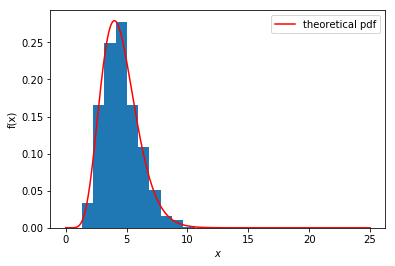

In [5]:
# сгенеруем выборку объема 1000 из гамма распределения с параметрами 
# k=9  θ=0.5
gamma_sample = np.random.gamma(9,0.5, 1000)

# расчитаем теоритеческую плотность вероятности 
#(pdf - probability density function) для гамма распределения 
x = np.linspace(0,25,1000)
pdf = sts.gamma(a=9,scale=0.5).pdf(x)
# построим гистограму выборки и поверх неё теоретическую плотность распределения 
plt.hist(gamma_sample,normed=True)
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.plot(x, pdf, label='theoretical pdf', color = 'r')
plt.legend()
plt.show()


# Вывод: 
как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

# Распределение выборочных средних

Согласно Центральной Предельной Теореме выборочные средние достаточно хорошо описывается нормальным распределением. X∼F(x),  X^n=(X1,X2,...,Xn)⇒ ̄X^n≈∼N(EX,DX/n).

в нашем случае гамма распределения: 
математическое ожидание : EX = k*θ=9*0.5=4.5  
дисперсия: DX = k*θ^2 = 9*0.5^2=2.25
Таким образом, распределение выборочных средних экспоненциального распределения с параметрами k=9  θ=0.5 будет приближаться нормальным распределением N( μ=4.5, σ^2 = 2.25/n)

In [100]:
def generate_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for i in range(1000):
        sample = np.random.gamma(9,0.5,n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
        
    
    # расчитаем теоритеческую плотность вероятности (pdf - probability density function) для нормального распределения
    mu = 4.5 # theoretical expectation
    sigma = np.sqrt(2.25/n)  # theoretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,15,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, normed = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

/home/DN080797MSN/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


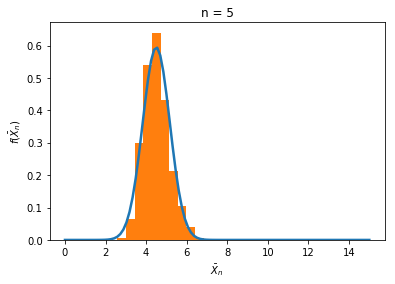

/home/DN080797MSN/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


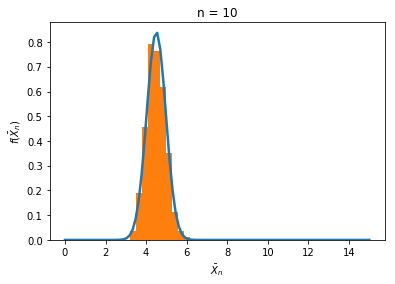

/home/DN080797MSN/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


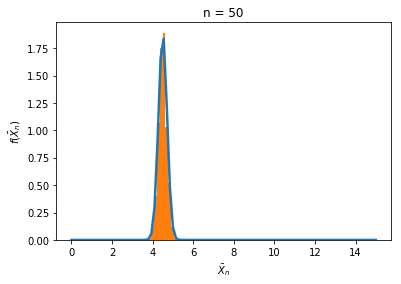

In [101]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [ 5, 10, 50]:
    generate_pdf(n)

Вывод: как видно из графиков даже при n=5 распределение выборочных средних достаточно хорошо соответствует приближающему его нормальному распределению, с увеличением n распределение становится все более гладким и все более похожим на
нормальное. Также стоит отметить, что с ростом n уменьшается дисперсия распределения выборочных средних. 